Importing Required Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

Loading the Dataset

In [21]:
# Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Display the first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  5YJSA1E22K       King  Seattle    WA      98112.0        2019   TESLA   
1  3MW39FS05R     Yakima   Zillah    WA      98953.0        2024     BMW   
2  1N4AZ0CP0F       King     Kent    WA      98031.0        2015  NISSAN   
3  5YJSA1H20F  Snohomish  Bothell    WA      98012.0        2015   TESLA   
4  JTMAB3FV1N     Yakima   Yakima    WA      98908.0        2022  TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL S          Battery Electric Vehicle (BEV)   
1        330E  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     MODEL S          Battery Electric Vehicle (BEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible due to low battery range       

Data Cleaning

In [22]:
# Drop unnecessary columns
df = df.drop(['VIN (1-10)', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract'], axis=1)

# Handle missing values
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df['Legislative District'].fillna(df['Legislative District'].mode()[0], inplace=True)

# Convert categorical columns to lowercase for consistency
df['Make'] = df['Make'].str.lower()
df['Model'] = df['Model'].str.lower()
df['City'] = df['City'].str.lower()
df['State'] = df['State'].str.lower()

# Check for duplicates
df = df.drop_duplicates()

Exploratory Data Analysis (EDA) - Basic Statistics

In [23]:
# Summary statistics for numerical columns
print(df.describe())

# Count of unique values in categorical columns
print(df.nunique())

        Postal Code    Model Year  Electric Range      Base MSRP  \
count  60594.000000  60598.000000    60598.000000   60598.000000   
mean   98083.242417   2020.123948       58.452573    1869.653454   
std     4229.099976      3.315508       86.095888   11085.770120   
min     1731.000000   1997.000000        0.000000       0.000000   
25%    98072.000000   2018.000000        0.000000       0.000000   
50%    98248.000000   2021.000000       21.000000       0.000000   
75%    98512.000000   2023.000000       73.000000       0.000000   
max    99577.000000   2025.000000      337.000000  845000.000000   

       Legislative District  
count          60598.000000  
mean              27.008763  
std               14.404492  
min                1.000000  
25%               15.000000  
50%               28.000000  
75%               40.000000  
max               49.000000  
County                                               197
City                                                 743
Sta

EDA - Distribution of Electric Vehicle Types

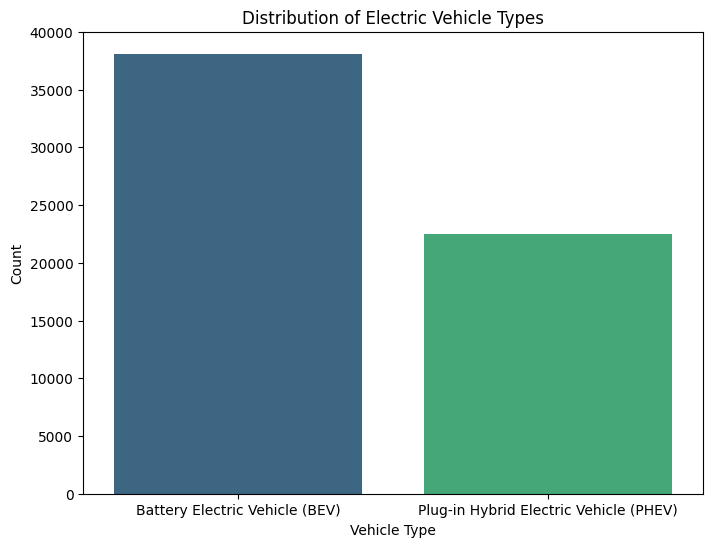

In [24]:
# Plot distribution of electric vehicle types
plt.figure(figsize=(8, 6))
sns.countplot(x='Electric Vehicle Type', data=df, palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

EDA - Top 10 EV Makes

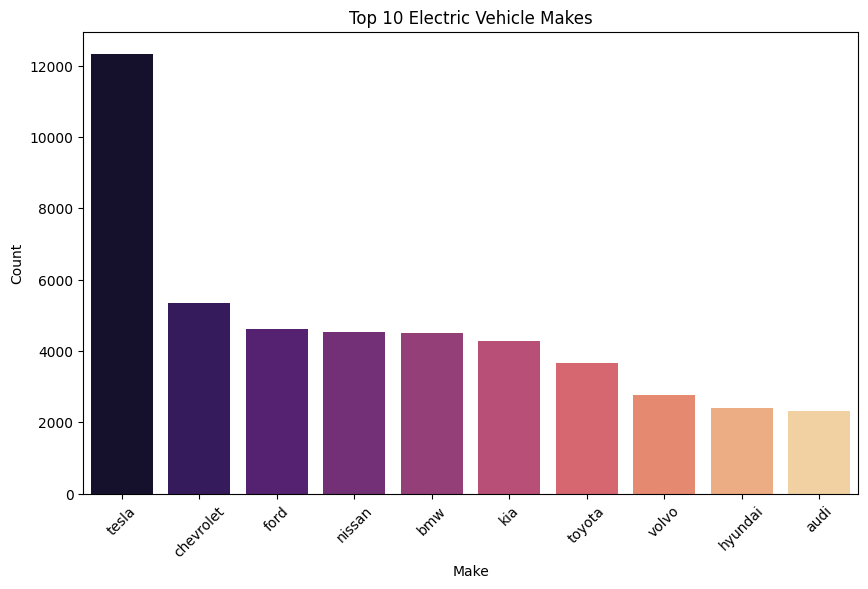

In [25]:
# Plot top 10 EV makes
top_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='magma')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

EDA - Distribution of Electric Range

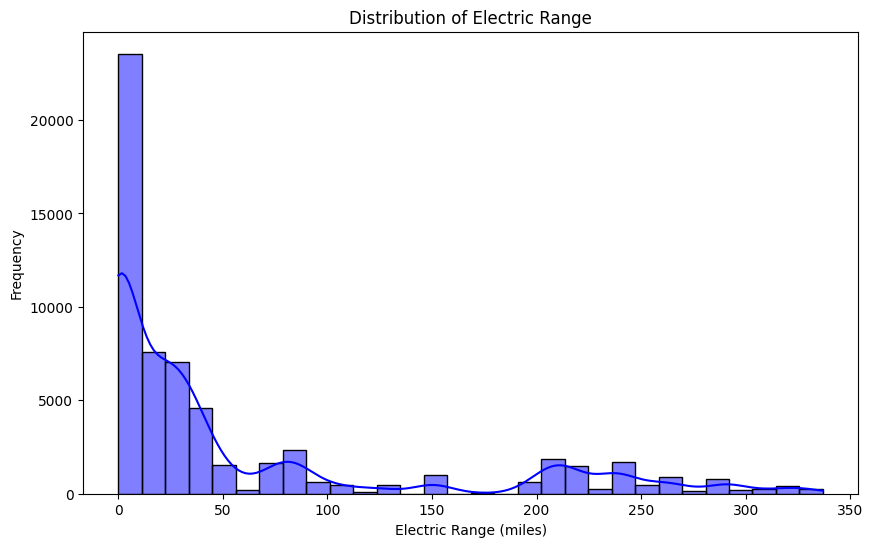

In [26]:
# Plot distribution of electric range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

EDA - Correlation Heatmap

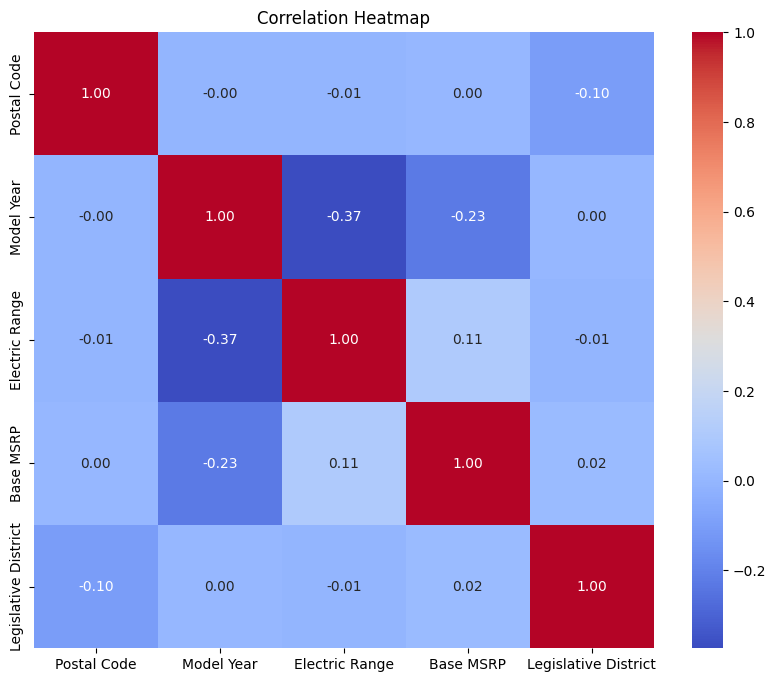

In [27]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

EDA - EV Adoption Over Time

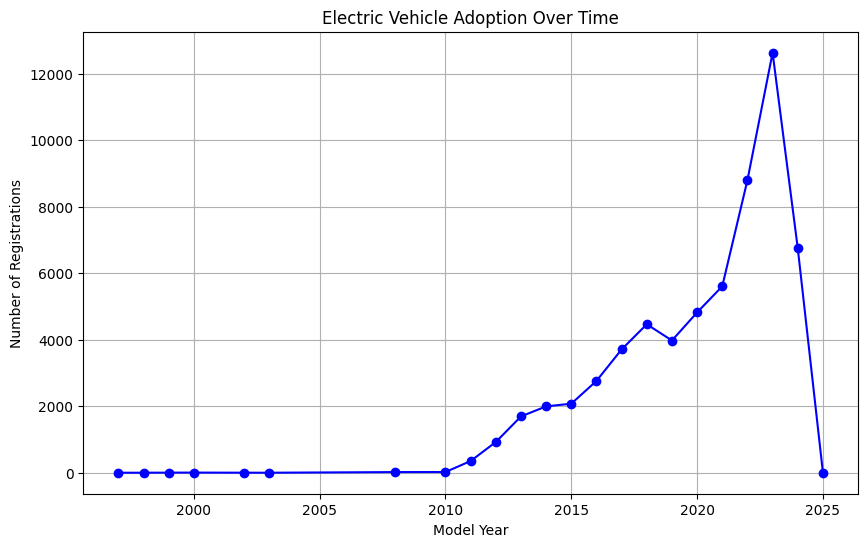

In [29]:
# Plot EV adoption over time
ev_adoption = df['Model Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
ev_adoption.plot(kind='line', marker='o', color='blue')
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()

EDA - Geographic Distribution of EVs

In [32]:
ev_map = folium.Map(location=[47.5, -122.3], zoom_start=7)
marker_cluster = MarkerCluster().add_to(ev_map)
for idx, row in df.iterrows():
    # Extract latitude and longitude, handling potential formatting issues
    try:
        if isinstance(row['Vehicle Location'], str):
            latitude, longitude = row['Vehicle Location'].strip('()').split(', ')
            latitude = float(latitude)
            longitude = float(longitude)
        else:
            # Handle cases where 'Vehicle Location' is not a string (e.g., NaN or float)
            print(f"Skipping row {idx} due to invalid location format: {row['Vehicle Location']}")
            continue

    except (ValueError, IndexError):
        # Handle cases where the format is unexpected
        print(f"Skipping row {idx} due to invalid location format: {row['Vehicle Location']}")
        continue

    folium.Marker(
        location=[latitude, longitude],  # Use extracted latitude and longitude
        popup=f"{row['Make']} {row['Model']}"
    ).add_to(marker_cluster)

# Display the map
ev_map.save('ev_map.html')

Streaming output truncated to the last 5000 lines.
Skipping row 170873 due to invalid location format: POINT (-122.1515174 48.0650751)
Skipping row 170874 due to invalid location format: POINT (-120.3283376 47.4280056)
Skipping row 170878 due to invalid location format: POINT (-123.4031294 48.1009483)
Skipping row 170881 due to invalid location format: POINT (-122.6906277 47.909901)
Skipping row 170883 due to invalid location format: POINT (-122.317523 45.595997)
Skipping row 170885 due to invalid location format: POINT (-122.144149 47.560742)
Skipping row 170886 due to invalid location format: POINT (-122.11597 48.194109)
Skipping row 170888 due to invalid location format: POINT (-122.225874 47.945309)
Skipping row 170889 due to invalid location format: POINT (-122.8826643 48.5053168)
Skipping row 170890 due to invalid location format: POINT (-122.6231895 47.5930874)
Skipping row 170891 due to invalid location format: POINT (-122.4408459 47.2499623)
Skipping row 170901 due to invalid 

Data Preprocessing - Encoding Categorical Variables

In [45]:
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df[column].fillna(df[column].median())

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [46]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['City'] = label_encoder.fit_transform(df['City'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Electric Vehicle Type'] = label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
#Adding this line to encode 'County'
df['County'] = label_encoder.fit_transform(df['County']) # Encode 'County' column

Data Preprocessing - Feature Scaling

In [47]:
# Scale numerical features
scaler = StandardScaler()
df[['Electric Range', 'Base MSRP', 'Legislative District']] = scaler.fit_transform(df[['Electric Range', 'Base MSRP', 'Legislative District']])

Splitting the Dataset

In [48]:
# Define features and target variable
X = df.drop(['Model Year', 'Vehicle Location'], axis=1)
y = df['Model Year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

In [49]:
for column in df.select_dtypes(include=['number']).columns:
    df[column] = df[column].fillna(df[column].median())

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [50]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}')

Linear Regression - MSE: 8.3535877442919, MAE: 2.1962714162861428, R2: 0.24368909546077344


Decision Tree Model

In [51]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R2: {r2_dt}')

Decision Tree - MSE: 1.3416674459112596, MAE: 0.8290126512651278, R2: 0.8785291122007611


Random Forest Model

In [52]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}')

Random Forest - MSE: 1.0290059796660602, MAE: 0.7446589080840312, R2: 0.9068366231276739


Feature Importance from Random Forest

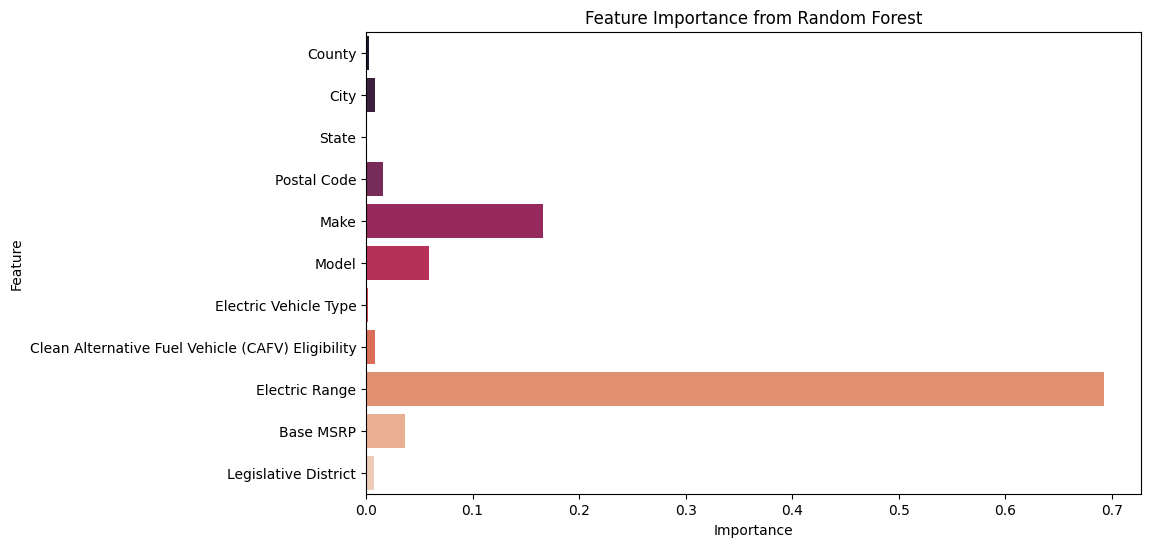

In [53]:
# Plot feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette='rocket')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Model Comparison

In [54]:
# Compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
})

print(model_comparison)

               Model       MSE       MAE        R2
0  Linear Regression  8.353588  2.196271  0.243689
1      Decision Tree  1.341667  0.829013  0.878529
2      Random Forest  1.029006  0.744659  0.906837


 Residual Plot for Random Forest

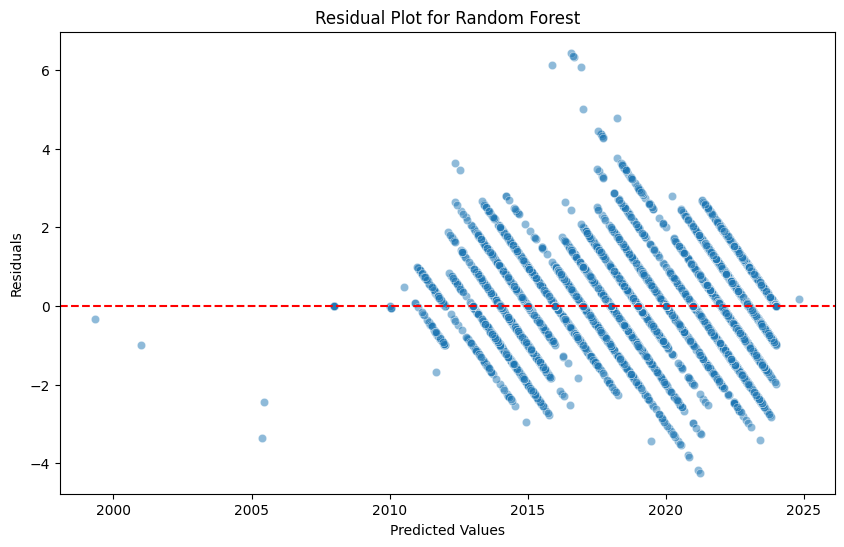

In [55]:
# Plot residuals for Random Forest
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Future Predictions

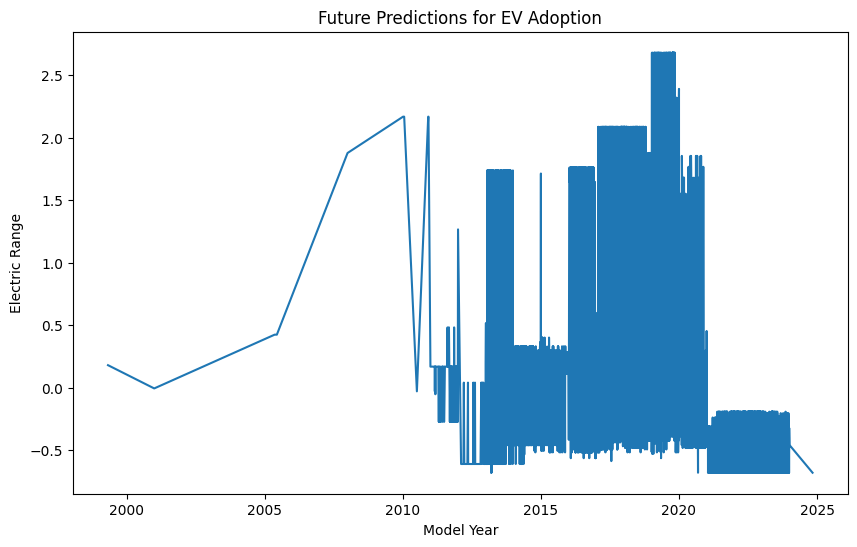

In [56]:
# Predict future EV adoption
future_data = X_test.copy()
future_data['Model Year'] = y_pred_rf

# Plot future predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x=future_data['Model Year'], y=future_data['Electric Range'], ci=None)
plt.title('Future Predictions for EV Adoption')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()